In [ ]:
%reset -f

##  Introduction:

In this project, I will analyze and predict the number of subscribers enrolled in Udemy courses based on various course attributes.

The dataset contains detailed information on 3,678 Udemy courses, including:

- Course ID and Title  
- Whether the course is paid or free  
- Price of the course  
- Number of subscribers (target variable)  
- Number of reviews  
- Number of lectures  
- Course level (Beginner, Intermediate, All Levels)  
- Content duration (in hours)  
- Published date  
- Course subject/category  

### Objective:

To build a **regression model** that predicts the number of subscribers a course might get based on its features such as price, content duration, course level, and subject.

### Approach:

- Data cleaning and preprocessing (handling categorical data and timestamps)  
- Exploratory data analysis to understand relationships between features and subscriber count  
- Build and compare **Linear Regression** and **Polynomial Regression** models  
- Evaluate models using MAE, RMSE, and R² metrics  
- Visualize actual vs predicted subscribers  
- Provide insights and recommendations for course creation and pricing strategies  

This project demonstrates how regression analysis can help online education platforms understand factors that drive course popularity and optimize their offerings.



Link of dataset is https://www.kaggle.com/datasets/yusufdelikkaya/udemy-online-education-courses

# ***Import Libraries:***

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ***Load Dataset:***

In [ ]:
df=pd.read_csv("udemy_online_education_courses_dataset.csv")
df.head(7)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,True,150,9221,138,25,All Levels,3.0,2014-05-02T15:13:30Z,Business Finance
6,739964,Investing And Trading For Beginners: Mastering...,https://www.udemy.com/investing-and-trading-fo...,True,65,1540,178,26,Beginner Level,1.0,2016-02-21T18:23:12Z,Business Finance


# ***EDA:***

# ***Data OverView:***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [ ]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [ ]:
df.isnull().sum()

,0
course_id,0
course_title,0
url,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
content_duration,0


In [ ]:
df.nunique()

,0
course_id,3672
course_title,3663
url,3672
is_paid,2
price,38
num_subscribers,2197
num_reviews,511
num_lectures,229
level,4
content_duration,105


In [ ]:
df.dtypes

,0
course_id,int64
course_title,object
url,object
is_paid,bool
price,int64
num_subscribers,int64
num_reviews,int64
num_lectures,int64
level,object
content_duration,float64


In [ ]:
print("Levels:", df['level'].unique())
print("Subjects:", df['subject'].unique())
print("Is Paid:", df['is_paid'].value_counts())

Levels: ['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']
Subjects: ['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']
Is Paid: is_paid
True     3368
False     310
Name: count, dtype: int64


In [ ]:
df['course_title'].duplicated().sum()

np.int64(15)

In [ ]:
df[['price', 'num_subscribers', 'num_lectures']].describe()

,price,num_subscribers,num_lectures
count,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,40.108755
std,61.005755,9504.117010,50.383346
min,0.000000,0.000000,0.000000
25%,20.000000,111.000000,15.000000
50%,45.000000,911.500000,25.000000
75%,95.000000,2546.000000,45.750000
max,200.000000,268923.000000,779.000000


In [ ]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
print("Oldest Course:", df['published_timestamp'].min())
print("Newest Course:", df['published_timestamp'].max())

Oldest Course: 2011-07-09 05:43:31+00:00
Newest Course: 2017-07-06 21:46:30+00:00


# ***Data Cleaning & Preprocessing:***

In [ ]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop(['course_id', 'url'], axis=1, inplace=True)

df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

df['publish_year'] = df['published_timestamp'].dt.year
df['publish_month'] = df['published_timestamp'].dt.month

In [ ]:

df.head(1)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,publish_year,publish_month
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017,1


In [ ]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['is_paid'] = df['is_paid'].astype(int)
df['level'] = df['level'].astype('category')
df['subject'] = df['subject'].astype('category')
df = pd.get_dummies(df, columns=['level', 'subject'], drop_first=True)
df

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,published_timestamp,publish_year,publish_month,level_Beginner Level,level_Expert Level,level_Intermediate Level,subject_Graphic Design,subject_Musical Instruments,subject_Web Development
0,Ultimate Investment Banking Course,1,200,2147,23,51,1.5,2017-01-18 20:58:58+00:00,2017,1,False,False,False,False,False,False
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,39.0,2017-03-09 16:34:20+00:00,2017,3,False,False,False,False,False,False
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,2.5,2016-12-19 19:26:30+00:00,2016,12,False,False,True,False,False,False
3,Beginner to Pro - Financial Analysis in Excel ...,1,95,2451,11,36,3.0,2017-05-30 20:07:24+00:00,2017,5,False,False,False,False,False,False
4,How To Maximize Your Profits Trading Options,1,200,1276,45,26,2.0,2016-12-13 14:57:18+00:00,2016,12,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,1,100,1040,14,21,2.0,2016-06-14 17:36:46+00:00,2016,6,False,False,False,False,False,True
3674,How To Design A WordPress Website With No Codi...,1,25,306,3,42,3.5,2017-03-10 22:24:30+00:00,2017,3,True,False,False,False,False,True
3675,Learn and Build using Polymer,1,40,513,169,48,3.5,2015-12-30 16:41:42+00:00,2015,12,False,False,False,False,False,True
3676,CSS Animations: Create Amazing Effects on Your...,1,50,300,31,38,3.0,2016-08-11 19:06:15+00:00,2016,8,False,False,False,False,False,True


In [ ]:
one_hot_cols = [
    'level_Beginner Level', 'level_Expert Level', 'level_Intermediate Level',
    'subject_Graphic Design', 'subject_Musical Instruments', 'subject_Web Development'
]

df[one_hot_cols] = df[one_hot_cols].astype(int)


In [ ]:
df

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,published_timestamp,publish_year,publish_month,level_Beginner Level,level_Expert Level,level_Intermediate Level,subject_Graphic Design,subject_Musical Instruments,subject_Web Development
0,Ultimate Investment Banking Course,1,200,2147,23,51,1.5,2017-01-18 20:58:58+00:00,2017,1,0,0,0,0,0,0
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,39.0,2017-03-09 16:34:20+00:00,2017,3,0,0,0,0,0,0
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,2.5,2016-12-19 19:26:30+00:00,2016,12,0,0,1,0,0,0
3,Beginner to Pro - Financial Analysis in Excel ...,1,95,2451,11,36,3.0,2017-05-30 20:07:24+00:00,2017,5,0,0,0,0,0,0
4,How To Maximize Your Profits Trading Options,1,200,1276,45,26,2.0,2016-12-13 14:57:18+00:00,2016,12,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,1,100,1040,14,21,2.0,2016-06-14 17:36:46+00:00,2016,6,0,0,0,0,0,1
3674,How To Design A WordPress Website With No Codi...,1,25,306,3,42,3.5,2017-03-10 22:24:30+00:00,2017,3,1,0,0,0,0,1
3675,Learn and Build using Polymer,1,40,513,169,48,3.5,2015-12-30 16:41:42+00:00,2015,12,0,0,0,0,0,1
3676,CSS Animations: Create Amazing Effects on Your...,1,50,300,31,38,3.0,2016-08-11 19:06:15+00:00,2016,8,0,0,0,0,0,1


# ***Visualizaion:***



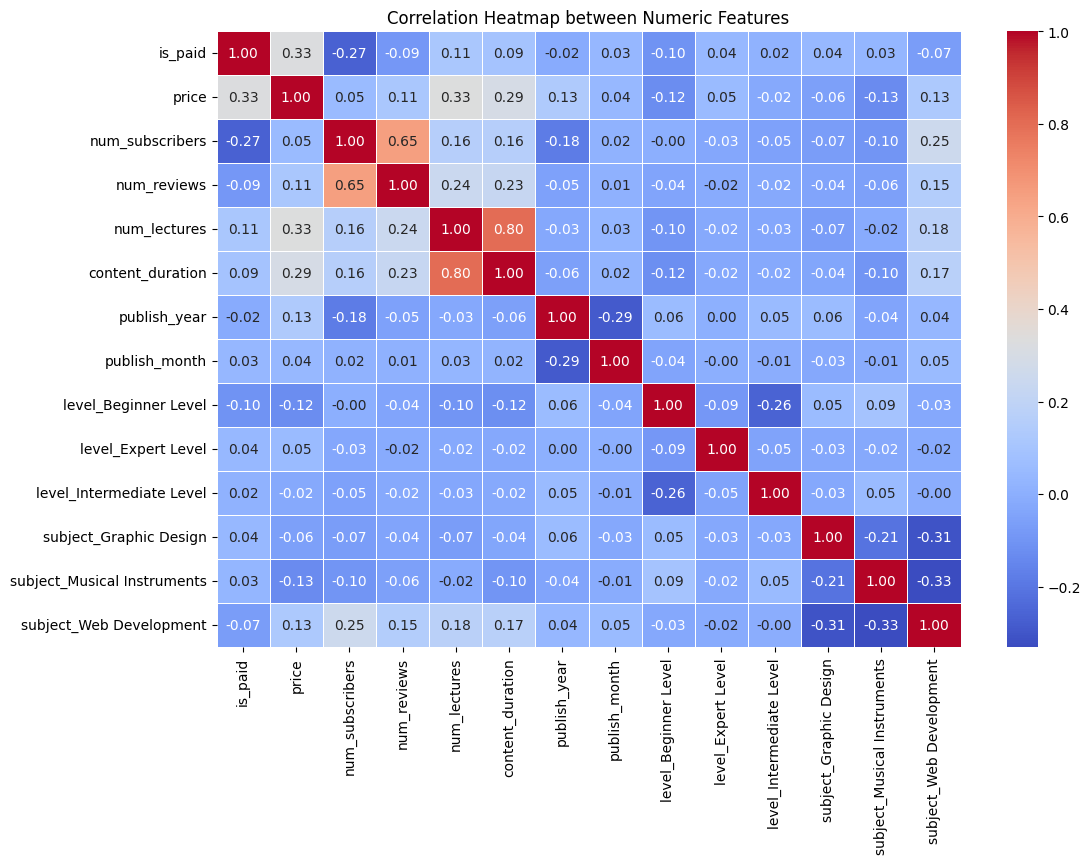

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32'])
corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Numeric Features')
plt.show()


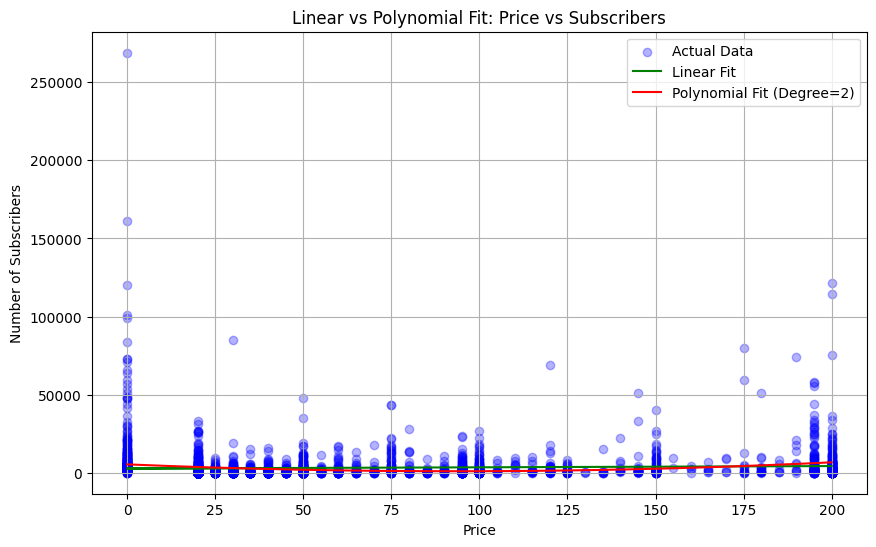

In [ ]:
x = df["price"].values.reshape(-1, 1)
y = df["num_subscribers"].values

linear_model = LinearRegression().fit(x, y)
y_pred_linear = linear_model.predict(x)

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
poly_model = LinearRegression().fit(x_poly, y)

x_range = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred_poly = poly_model.predict(x_range_poly)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="blue", alpha=0.3, label="Actual Data")
plt.plot(x, y_pred_linear, color="green", label="Linear Fit")
plt.plot(x_range, y_pred_poly, color="red", label="Polynomial Fit (Degree=2)")
plt.xlabel("Price")
plt.ylabel("Number of Subscribers")
plt.title("Linear vs Polynomial Fit: Price vs Subscribers")
plt.legend()
plt.grid(True)
plt.show()


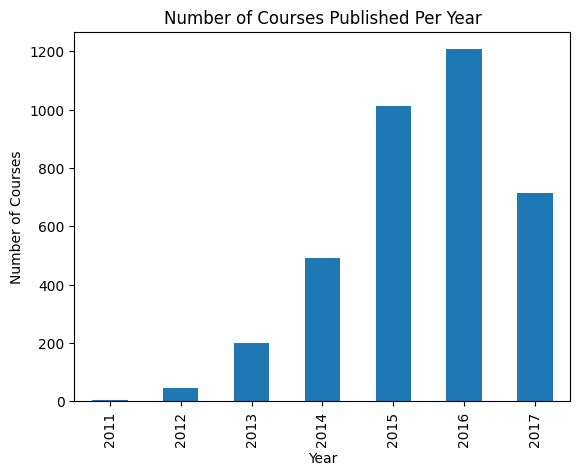

In [ ]:
df['publish_year'] = df['published_timestamp'].dt.year

df['publish_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Courses Published Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Courses")
plt.show()


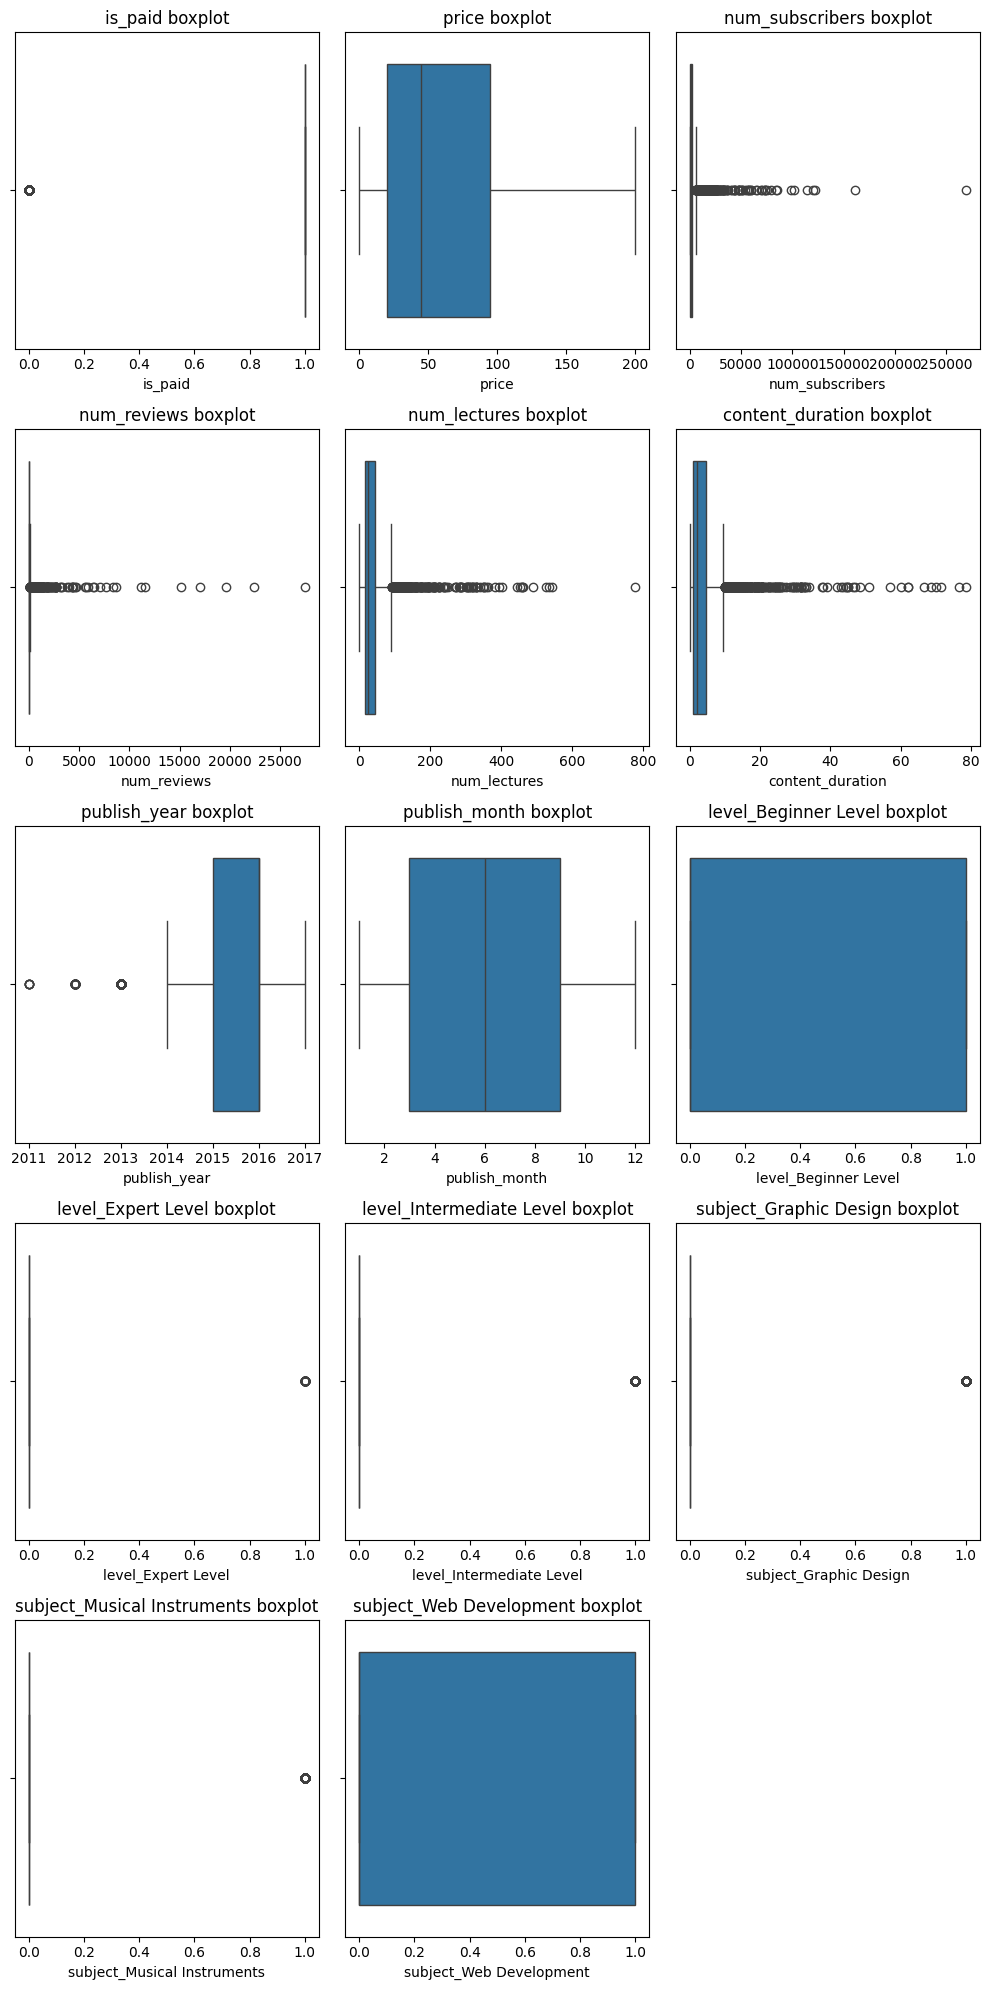

In [ ]:
num_cols = df.select_dtypes("number").columns
n_cols = 3
n_rows = (len(num_cols) + 1) // n_cols
plt.figure(figsize=(10, 4 * n_rows))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"{col} boxplot")
    plt.tight_layout()
plt.show()


In [ ]:
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR

    df[col] = df[col].apply(lambda x: Lower_Fence if x < Lower_Fence else Upper_Fence if x > Upper_Fence else x)


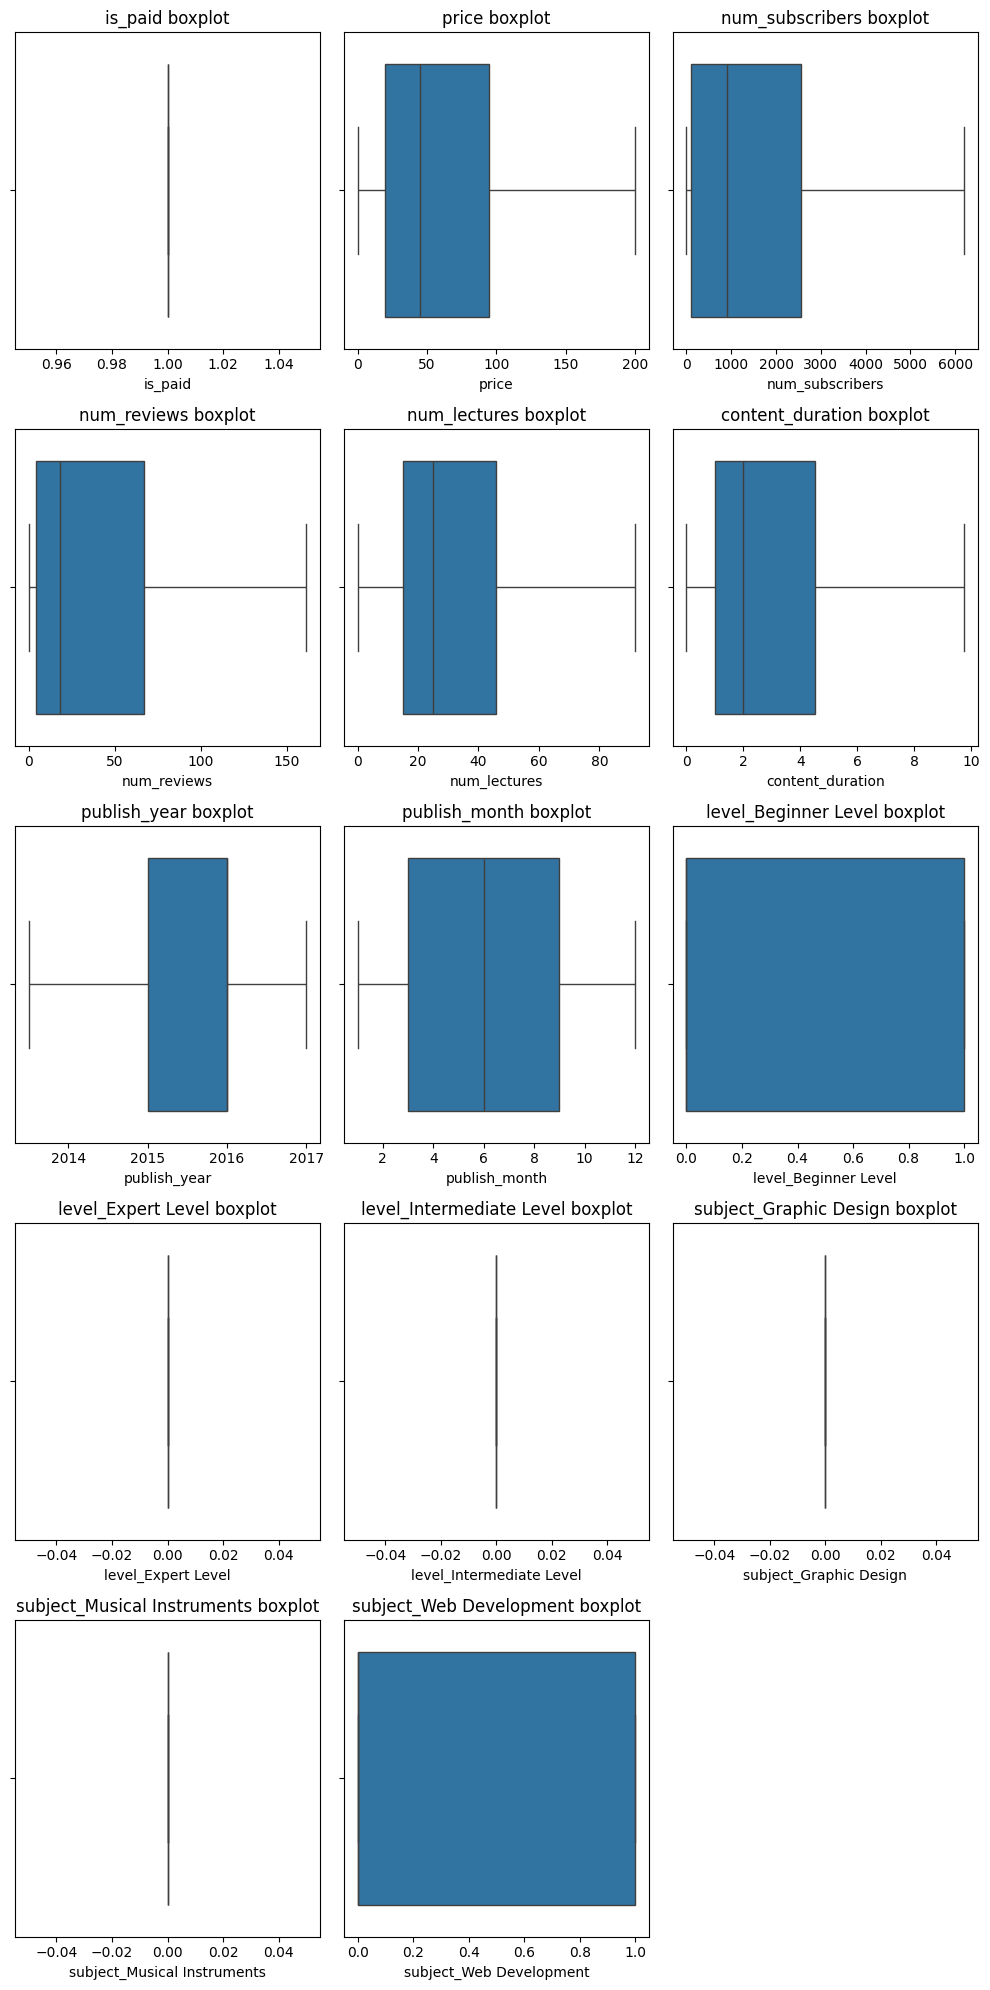

In [ ]:

num_cols = df.select_dtypes("number").columns
n_cols = 3
n_rows = (len(num_cols) + 1) // n_cols

plt.figure(figsize=(10, 4 * n_rows))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"{col} boxplot")
    plt.tight_layout()
plt.show()


# ***Model Building:***

**Feature Selection Explanation**


The following features were selected to build the subscriber count prediction model:

- **is_paid:** Differentiates between free and paid courses, which influences user enrollment decisions.  
- **price:** The course price directly affects its attractiveness to potential subscribers.  
- **num_reviews:** The number of reviews reflects user engagement and content quality, impacting course popularity.  
- **num_lectures:** Indicates the amount of content provided in the course.  
- **content_duration:** Total hours of course material, representing the depth of content coverage.  
- **publish_year and publish_month:** The publication date affects subscriber count due to course age and exposure.  
- **Level features (level_Beginner Level, level_Expert Level, level_Intermediate Level):** Represent the course difficulty and target audience.  
- **Subject features (subject_Graphic Design, subject_Musical Instruments, subject_Web Development):** The course category influences the expected audience size and interest.


In [ ]:
X = df[['is_paid', 'price', 'num_reviews', 'num_lectures', 'content_duration',
        'publish_year', 'publish_month',
        'level_Beginner Level', 'level_Expert Level', 'level_Intermediate Level',
        'subject_Graphic Design', 'subject_Musical Instruments', 'subject_Web Development']]

y = df['num_subscribers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

poly_model.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [ ]:

y_pred = poly_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

results_df = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-squared (R²)"],
    "Value": [mae, mse, rmse, r2]
})

results_df["Value"] = results_df["Value"].apply(lambda x: f"{x:.4f}")

print("Polynomial Regression Evaluation Metrics:\n")
print(results_df.to_string(index=False))


Polynomial Regression Evaluation Metrics:

                        Metric        Value
     Mean Absolute Error (MAE)     938.1087
      Mean Squared Error (MSE) 1800946.9100
Root Mean Squared Error (RMSE)    1341.9936
                R-squared (R²)       0.5709


## Final Recommendation

The Polynomial Regression model worked better than the simple Linear Regression model and explained about 57% of the changes in subscriber numbers.

To improve the model further, you can try:

- Using more advanced models like Random Forest or Gradient Boosting.  
- Adding or selecting better features.  
- Scaling or transforming the data.

These models can help understand what affects course popularity and help make better decisions to attract more students.
